# **Introduction**

This notebook explores various approaches to **data visualisation** using python.

Immigrants from 150+ countries between 1980 to 2013

This is a continuation of the 1st data viz task.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Let's explore some EDA in Python - **Exploratory Data Analysis**

In [2]:
#Importing Libraries 
import numpy as np  
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from wordcloud import WordCloud, STOPWORDS

# Inline backend
%matplotlib inline
mpl.style.use(['ggplot'])
import warnings
warnings.filterwarnings('ignore')

**Data Extraction**

In [3]:
! pip install kaggle #install kaggle library
! mkdir ~/.kaggle #make a directory for kaggle

In [4]:
cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [5]:
#! kaggle datasets download unitednations/refugee-data #also works
!kaggle datasets download -d ammaraahmad/immigration-to-canada

  0% 0.00/12.9k [00:00<?, ?B/s]
100% 12.9k/12.9k [00:00<00:00, 4.75MB/s]


In [6]:
! unzip immigration-to-canada.zip #to unzip the data

Archive:  immigration-to-canada.zip
  inflating: canadian_immegration_data.csv  


In [7]:
immigration_canada = pd.read_csv("canadian_immegration_data.csv") #from csv into pandas 
immigration_canada.head(20) #Test Data

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15
5,Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,5,5,11,6,8,23,26,22,8,26,38,27,58,49,70,169,168,165,268,295,184,106,76,62,61,39,70,45,2113
6,Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,51,61,34,51,31,59,61,44,18,23,21,27,19,12,13,25,17,25,14,24,32,15,32,38,27,37,51,25,981
7,Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,213,519,374,538,678,763,1023,1022,366,380,396,391,349,318,427,635,865,1745,1591,1153,847,620,540,467,459,278,263,282,19596
8,Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,22,21,66,75,102,115,89,112,124,87,132,153,147,224,218,198,205,267,252,236,258,207,3310
9,Australia,Oceania,Australia and New Zealand,Developed regions,702,639,484,317,317,319,356,467,410,553,620,640,734,886,702,668,699,623,479,523,599,799,747,876,930,909,875,1033,1018,1018,933,851,982,1121,23829


## **Data Processing**

In [8]:
immigration_canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    195 non-null    object
 1   Continent  195 non-null    object
 2   Region     195 non-null    object
 3   DevName    195 non-null    object
 4   1980       195 non-null    int64 
 5   1981       195 non-null    int64 
 6   1982       195 non-null    int64 
 7   1983       195 non-null    int64 
 8   1984       195 non-null    int64 
 9   1985       195 non-null    int64 
 10  1986       195 non-null    int64 
 11  1987       195 non-null    int64 
 12  1988       195 non-null    int64 
 13  1989       195 non-null    int64 
 14  1990       195 non-null    int64 
 15  1991       195 non-null    int64 
 16  1992       195 non-null    int64 
 17  1993       195 non-null    int64 
 18  1994       195 non-null    int64 
 19  1995       195 non-null    int64 
 20  1996       195 non-null    int64

In [9]:
immigration_canada.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,964.379487,1064.148718,1136.856410,1138.712821,993.153846,962.625641,1026.076923,989.153846,824.241026,922.143590,1111.343590,1244.323077,1144.158974,1114.343590,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,3158.730195,2952.093731,3330.083742,3495.220063,3613.336444,3091.492343,3321.045004,3070.761447,2385.943695,2887.632585,3664.042361,3961.621410,3660.579836,3623.509519,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,2.000000,3.000000,6.500000,11.500000,9.500000,10.500000,14.500000,19.500000,15.000000,16.000000,16.000000,22.000000,18.500000,21.500000,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,38.000000,51.000000,74.000000,85.000000,76.000000,91.000000,118.000000,114.000000,106.000000,116.000000,138.000000,169.000000,165.000000,161.000000,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,612.500000,657.500000,655.000000,722.500000,545.000000,550.500000,603.500000,612.500000,535.500000,548.500000,659.000000,793.500000,686.000000,673.500000,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,31668.000000,23380.000000,34123.000000,33720.000000,39231.000000,30145.000000,29322.000000,22965.000000,21049.000000,30069.000000,35529.000000,36434.000000,31961.000000,36439.000000,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [10]:
print(f'Number of rows: {immigration_canada.shape[0]}; Number of columns: {immigration_canada.shape[1]}; Number of missing values: {sum(immigration_canada.isna().sum())}')

Number of rows: 195; Number of columns: 39; Number of missing values: 0


In [11]:
immigration_canada.Region.value_counts() #counting the number of occurence for Region column

Western Asia                 18
Eastern Africa               17
Western Africa               16
Southern Europe              14
Caribbean                    13
South America                12
South-Eastern Asia           10
Eastern Europe               10
Northern Europe              10
Middle Africa                 9
Western Europe                9
Southern Asia                 9
Central America               8
Northern Africa               7
Eastern Asia                  7
Central Asia                  5
Southern Africa               5
Polynesia                     4
Micronesia                    4
Melanesia                     4
Australia and New Zealand     2
Northern America              2
Name: Region, dtype: int64

In [12]:
immigration_canada.Continent.value_counts() #counting the number of occurence for Continent column

Africa                             54
Asia                               49
Europe                             43
Latin America and the Caribbean    33
Oceania                            14
Northern America                    2
Name: Continent, dtype: int64

In [13]:
Continent_count = immigration_canada['Continent'].value_counts().sort_index() 
Continent_count_immigration_canada = pd.DataFrame(Continent_count)
#pd.options.display.float_format = '{:,.2f}%'.format
Continent_count_immigration_canada['Continent(%)'] = (Continent_count_immigration_canada/Continent_count.sum()*100)
Continent_count_immigration_canada.sort_values('Continent(%)', ascending=False, inplace=True)
display(Continent_count_immigration_canada)

,Continent,Continent(%)
Africa,54,27.692308
Asia,49,25.128205
Europe,43,22.051282
Latin America and the Caribbean,33,16.923077
Oceania,14,7.179487
Northern America,2,1.025641


In [14]:
immigration_canada.columns

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')

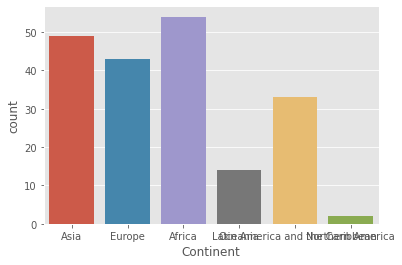

In [15]:
sns.countplot(immigration_canada['Continent'])
# just a simple plot, we'll plot more as we go further

## Data Transformation

In [16]:
# For consistency, we need to ensure that all column (labels) are of type string 
# by checking the types of the column labels
all(isinstance(column, str) for column in immigration_canada.columns)

True

### **Change first reference column**

In [17]:
# We set the country name as index (first reference column)
immigration_canada.set_index('Country', inplace=True)
immigration_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [18]:
print('Data dimensions:', immigration_canada.shape)

Data dimensions: (195, 38)


In [19]:
# Short summary 
immigration_canada.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Columns: 38 entries, Continent to Total
dtypes: int64(35), object(3)
memory usage: 59.4+ KB


In [20]:
# Column names
# it wont count country column because it's the index
immigration_canada.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [21]:
# we'll be using this later on to plot
years = list(map(str, range(1980, 2014)))

# EDA 3 - Using Plotly Part 1 

**Raceplot**

In [66]:
import numpy as np # maths
import pandas as pd # data processing, 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [67]:
# have already defined my dataframe and extracted the csv file
immigration_canada 

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217,2985


In [68]:
immigration_canada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Continent  195 non-null    object
 1   Region     195 non-null    object
 2   DevName    195 non-null    object
 3   1980       195 non-null    int64 
 4   1981       195 non-null    int64 
 5   1982       195 non-null    int64 
 6   1983       195 non-null    int64 
 7   1984       195 non-null    int64 
 8   1985       195 non-null    int64 
 9   1986       195 non-null    int64 
 10  1987       195 non-null    int64 
 11  1988       195 non-null    int64 
 12  1989       195 non-null    int64 
 13  1990       195 non-null    int64 
 14  1991       195 non-null    int64 
 15  1992       195 non-null    int64 
 16  1993       195 non-null    int64 
 17  1994       195 non-null    int64 
 18  1995       195 non-null    int64 
 19  1996       195 non-null    int64 
 20  1997       195 non-nul

In [69]:
immigration_canada.isna().sum()

Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [70]:
immigration_canada.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [76]:
immigration_canada.reset_index()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59,1677


In [77]:
immigration_canada2 = immigration_canada.reset_index() 
# bringing back country to column and not the index again

In [78]:
immigration_canada2

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59,1677


In [79]:
data = immigration_canada2.melt(id_vars=['Country','Continent','Region','DevName'], 
               var_name=['Year'], 
              value_name="Value")

## Install Raceplot

In [80]:
!pip install raceplotly
from raceplotly.plots import barplot

In [81]:
data = data[data['Year']!='Total']

In [86]:
year_imm = data.groupby('Year')['Value'].sum().reset_index()

fig = px.scatter(x=year_imm['Year'], y=year_imm['Value'])

fig.update_traces(mode='markers+lines',marker=dict(color='gold',line=dict(color='gold')))

fig.update_layout(margin={'b':0,'l':0,'r':0,},
                 paper_bgcolor='rgb(230, 230, 245)',
                 plot_bgcolor='rgb(230, 230, 245)',
                 title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'blue'
                         },'text':'Total Immigrants Over The Years -Canada',
                        'x':0.45,'y':0.9})
fig.show()

In [88]:
fig = px.pie(names = immigration_canada2['DevName'].value_counts().index,
            values = immigration_canada2['DevName'].value_counts())

fig.update_traces(hole=0.6,marker=dict(colors=['lightgreen','lightblue']))

fig.add_annotation(showarrow=False, x=0.50,y=0.5,text='Developing Or Developed',font=dict(size=15,color='grey'))

fig.add_annotation(x=0.25,y=0.7,text='Developed Regions',showarrow=False)

fig.add_annotation(x=0.76,y=0.5,text='Developing Regions', showarrow=False)

fig.update_layout(margin={'b':0,'l':0,'r':0,'t':100},
                 paper_bgcolor='rgb(248, 248, 255)',
                 plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },'text':'Region Status',
                        'x':0.50,'y':0.9},
                 showlegend=False)
fig.show()


In [89]:
dev_imm = data.groupby('DevName')['Value'].sum().reset_index()

fig = px.bar(x = dev_imm['DevName'],
             y = dev_imm['Value'],
             text = dev_imm['Value']/dev_imm['Value'].sum())

fig.update_traces(textposition='outside', marker=dict(color=['lightyellow','azure'],line=dict(color='black',width=1)))

fig.update_layout(margin={'b':0,'l':0,'r':0,'t':100},
                 paper_bgcolor='rgb(248, 248, 255)',
                 plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },'text':'Total Immigrants From Devloped & Developing Regions',
                        'x':0.50,'y':0.9},
                 showlegend=False)
fig.show()


## Country Race Plot

In [97]:
my_raceplot = barplot(data,  
                      item_column='Country', 
                      value_column='Value', 
                      time_column='Year',
                      top_entries=12)

my_raceplot.plot(item_label = 'Top 12 Countries', 
                 value_label = 'Immigrants | (chart complied  by Tolulade Ademisoye)', 
                 frame_duration = 900,
                 title=' A look at Immigrants coming into Canada over the Years',
                 )

## Continent Race Plot

In [98]:
my_raceplot = barplot(data,  
                      item_column='Continent', 
                      value_column='Value', 
                      time_column='Year',
                      top_entries=6)

my_raceplot.plot(item_label = 'By Continent', 
                 value_label = 'Immigrants | (chart complied  by Tolulade Ademisoye)', 
                 frame_duration = 1000,
                 title='Immigrants arriving into Canada from Several Continents Over the Years',
                 )

Data Source: [link](https://www.kaggle.com/ammaraahmad/immigration-to-canada)


---

**References:**

[Data Visualisation using Race plot](https://www.kaggle.com/aqsasadaf/immigrants-arriving-in-canada-raceplotly)

[Undo set_index in a pandas dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) - 

Set_index (change first column to index) [link text](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html) - 

[Working with Plotly ](https://towardsdatascience.com/how-to-create-a-plotly-visualization-and-embed-it-on-websites-517c1a78568b)